In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import math
import pickle
import seaborn as sns

In [2]:
df = pd.read_csv(r"data/test_scores.csv")
df.head()

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


In [3]:
x = np.array(df.math)
y = np.array(df.cs)
x,y

(array([92, 56, 88, 70, 80, 49, 65, 35, 66, 67]),
 array([98, 68, 81, 80, 83, 52, 66, 30, 68, 73]))

In [4]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 20
    n = len(x)
    learning_rate = 0.0001
    cost_previous = 0
    for i in range(iterations):
        y_pred = m_curr * x + b_curr
        cost_mse = (1/n) * sum([val**2 for val in y-y_pred])
        md = -(2/n) * sum(x*(y-y_pred))
        bd = -(2/n) * sum(y-y_pred)
        m_curr-=learning_rate*md
        b_curr-=learning_rate*md
        print(f"iteration: {i}, m:{m_curr}, b:{b_curr}, mse:{cost_mse}")
        if math.isclose(cost_mse, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost_mse
    return m_curr, b_curr

In [5]:
print(f"Slope(m) and intercept (b) after gradient_descent: {gradient_descent(x,y)}")

iteration: 0, m:0.9891800000000002, b:0.9891800000000002, mse:5199.1
iteration: 1, m:1.0285889312, b:1.0285889312, mse:39.855386686639925
iteration: 2, m:1.0301589830190079, b:1.0301589830190079, mse:31.662656824399047
iteration: 3, m:1.0302215338834773, b:1.0302215338834773, mse:31.64949993957238
iteration: 4, m:1.0302240259099178, b:1.0302240259099178, mse:31.649472954165603
iteration: 5, m:1.030224125192251, b:1.030224125192251, mse:31.649472668211583
iteration: 6, m:1.0302241291476593, b:1.0302241291476593, mse:31.649472658071723
iteration: 7, m:1.0302241293052428, b:1.0302241293052428, mse:31.64947265766976
iteration: 8, m:1.0302241293115209, b:1.0302241293115209, mse:31.649472657653714
iteration: 9, m:1.030224129311771, b:1.030224129311771, mse:31.649472657653106
iteration: 10, m:1.0302241293117809, b:1.0302241293117809, mse:31.649472657653078
iteration: 11, m:1.0302241293117813, b:1.0302241293117813, mse:31.649472657653064
iteration: 12, m:1.0302241293117815, b:1.030224129311781

In [6]:
reg = linear_model.LinearRegression()

In [7]:
x,y

(array([92, 56, 88, 70, 80, 49, 65, 35, 66, 67]),
 array([98, 68, 81, 80, 83, 52, 66, 30, 68, 73]))

In [8]:
reg.fit(df[['math']],df[['cs']])

LinearRegression()

In [9]:
print(f"Slope(m): {reg.coef_}, Intercept(b): {reg.intercept_}")

Slope(m): [[1.01773624]], Intercept(b): [1.91521931]


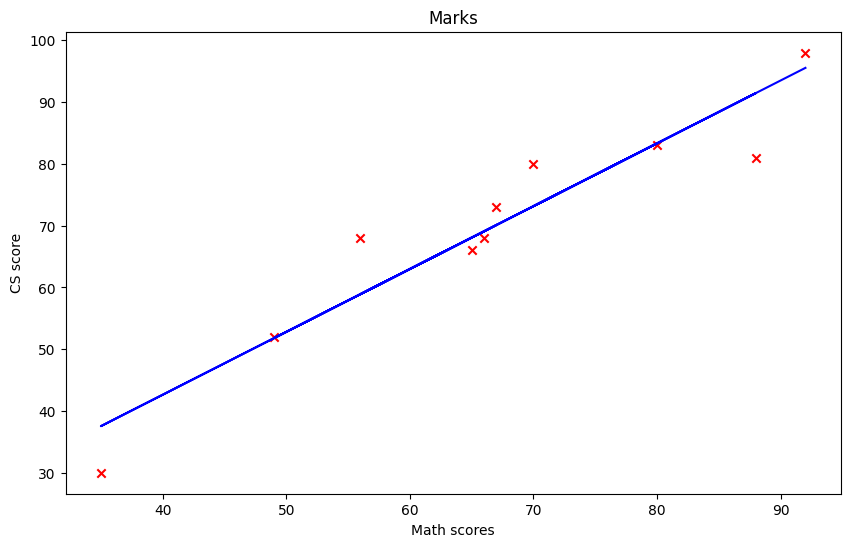

In [10]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.scatter(df[['math']],df[['cs']], color='red', marker = 'x')
plt.xlabel('Math scores')
plt.ylabel('CS score')
plt.title('Marks')
plt.plot(df[['math']], reg.predict(df[['math']]), color='blue')
plt.show()

In [11]:
with open("linear_model", "wb") as f:
    pickle.dump(reg,f)

In [12]:
with open("linear_model", "rb") as f:
    model = pickle.load(f)

In [15]:
model.predict([[95]])

C:\Users\amrkaur\.conda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[98.60016191]])

In [16]:
model.coef_, model.intercept_

(array([[1.01773624]]), array([1.91521931]))